# 03_Machine_Learning_Solutions

### INTERMEDIATE QUESTIONS :

Q-1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the df
df = pd.read_csv('/content/instagram_reach.csv')

# Split the df into input features (X) and target variables (y)
X = df[['USERNAME', 'Caption', 'Hashtags', 'Followers']]
y_likes = df['Likes']
y_time_since_posted = df['Time since posted']

# Preprocess the input features
# Feature hashing for 'Caption' column
caption_vectorizer = HashingVectorizer(n_features=1000)
X_caption = caption_vectorizer.fit_transform(X['Caption'])

# Feature hashing for 'Hashtags' column
hashtags_vectorizer = HashingVectorizer(n_features=100)
X_hashtags = hashtags_vectorizer.fit_transform(X['Hashtags'])

# Concatenate the hashed features with other numerical features
X_processed = pd.concat([X[['USERNAME', 'Followers']], pd.DataFrame(X_caption.toarray()), pd.DataFrame(X_hashtags.toarray())], axis=1)

# Split the df into training and testing sets
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
    X_processed, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

# Train a linear regression model for predicting number of likes
likes_model = LinearRegression()
likes_model.fit(X_train, y_likes_train)

# Train a linear regression model for predicting time since posted
time_model = LinearRegression()
time_model.fit(X_train, y_time_train)

# Make predictions on the testing set for number of likes
likes_predictions = likes_model.predict(X_test)

# Make predictions on the testing set for time since posted
time_predictions = time_model.predict(X_test)

# Evaluate the model for number of likes
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
likes_mae = mean_absolute_error(y_likes_test, likes_predictions)
likes_r2 = r2_score(y_likes_test, likes_predictions)

# Evaluate the model for time since posted
time_mse = mean_squared_error(y_time_test, time_predictions)
time_mae = mean_absolute_error(y_time_test, time_predictions)
time_r2 = r2_score(y_time_test, time_predictions)

# Print the evaluation metrics
print('Number of Likes - MSE: ', likes_mse)
print('Number of Likes - MAE: ', likes_mae)
print('Number of Likes - R^2: ', likes_r2)

print('Time Since Posted - MSE: ', time_mse)
print('Time Since Posted - MAE: ', time_mae)
print('Time Since Posted - R^2: ', time_r2)

# Now you can use the trained models to make predictions on new data
new_data = pd.DataFrame({'USERNAME': ['new_user'], 'Caption': ['new_caption'], 'Hashtags': ['new_hashtag'], 'Followers': [1000]})
new_caption = caption_vectorizer.transform(new_data['Caption'])
new_hashtags = hashtags_vectorizer.transform(new_data['Hashtags'])
new_data_processed = pd.concat([new_data[['USERNAME', 'Followers']], pd.DataFrame(new_caption.toarray()), pd.DataFrame(new_hashtags.toarray())], axis=1)
new_likes_prediction = likes_model.predict(new_data_processed)
new_time_prediction = time_model.predict(new_data_processed)

print('New Data - Number of Likes Prediction: ', new_likes_prediction)
print('New Data - Time Since Posted Prediction: ', new_time_prediction)


Q-2. Imagine you have a dataset where you have different features like Age ,

Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Load the dataset
import pandas as pd

#url = 'https://raw.githubusercontent.com/Dr-Sanjay/Datasets/main/Assignments/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv("C:\\Users\\Realme\\Desktop\\Datasets\\ObesityDataSet_raw_and_data_sinthetic.csv")

# Print the first 5 rows of the dataframe
df.head()



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

c:\Users\Realme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Realme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Realme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


ValueError: could not convert string to float: 'no'

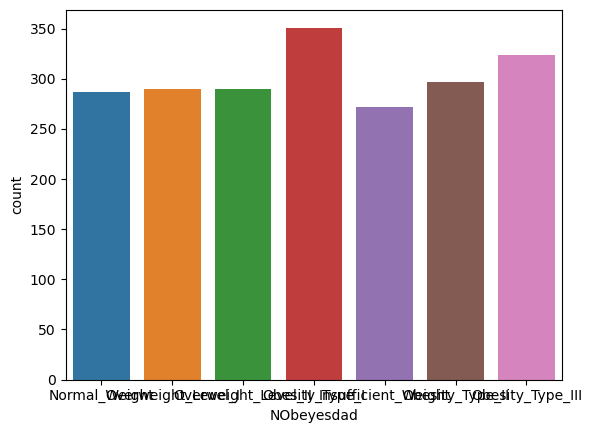

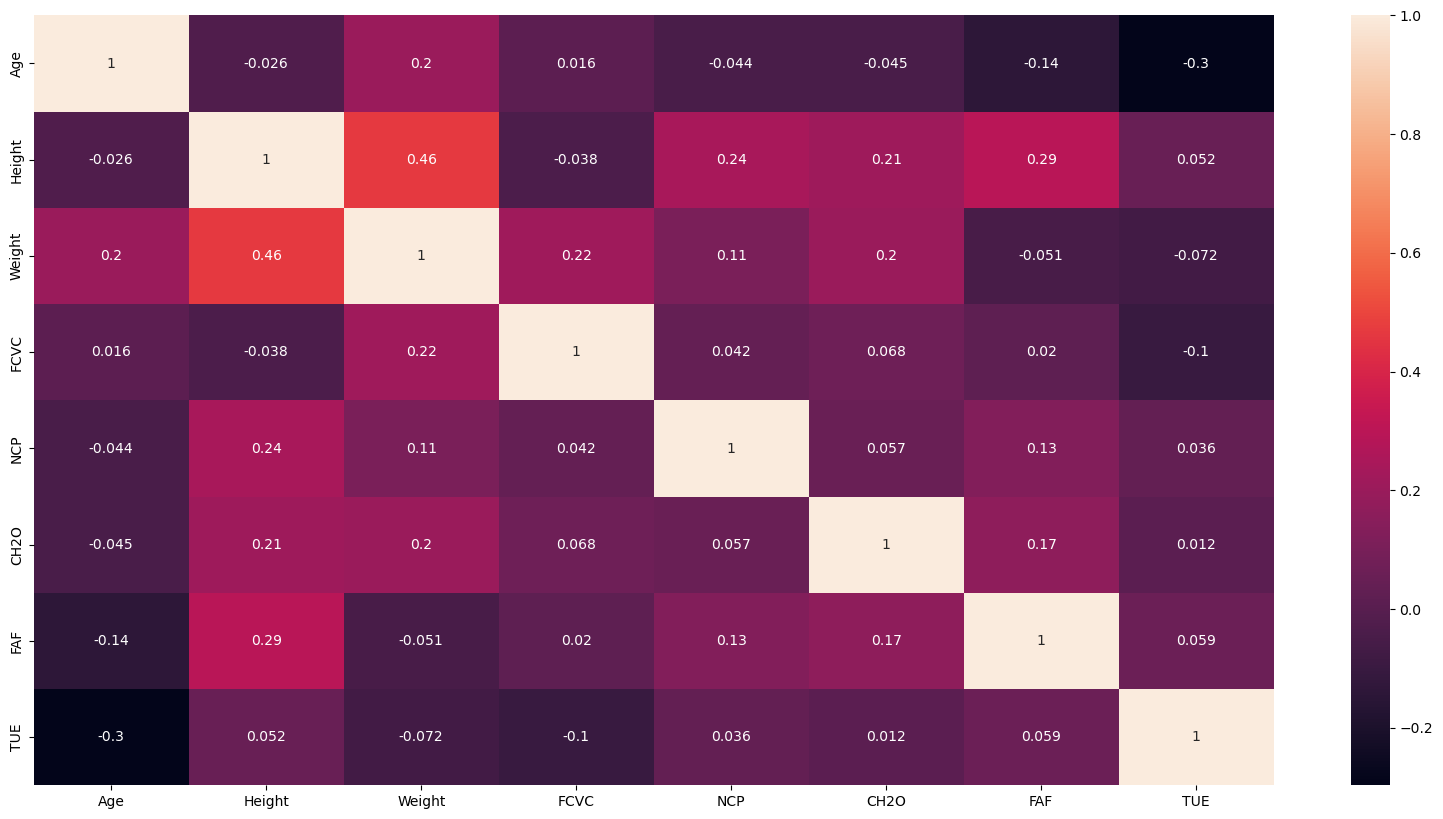

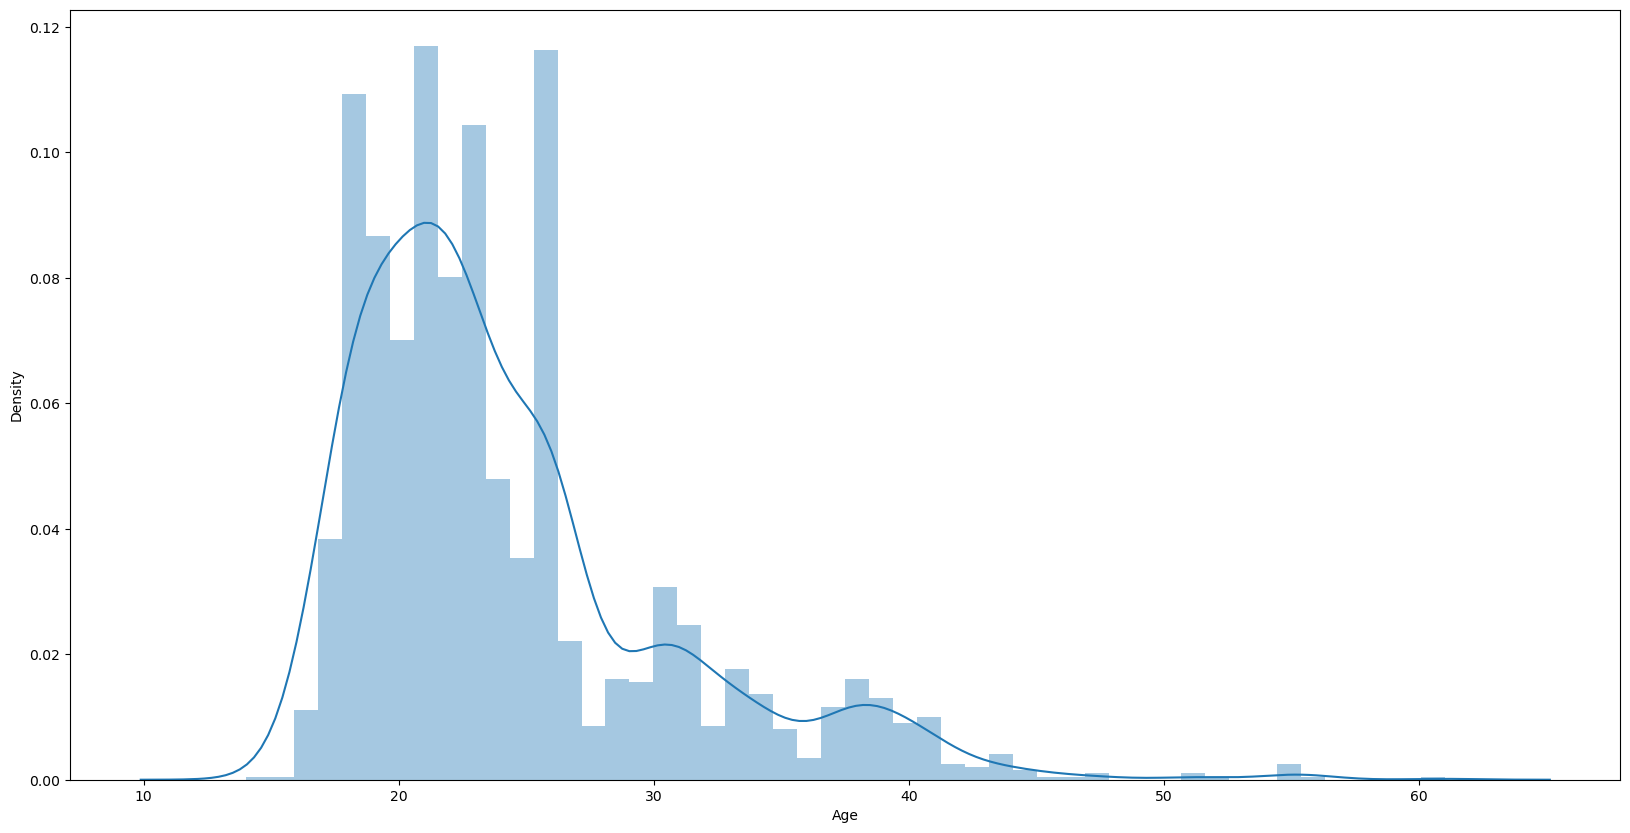

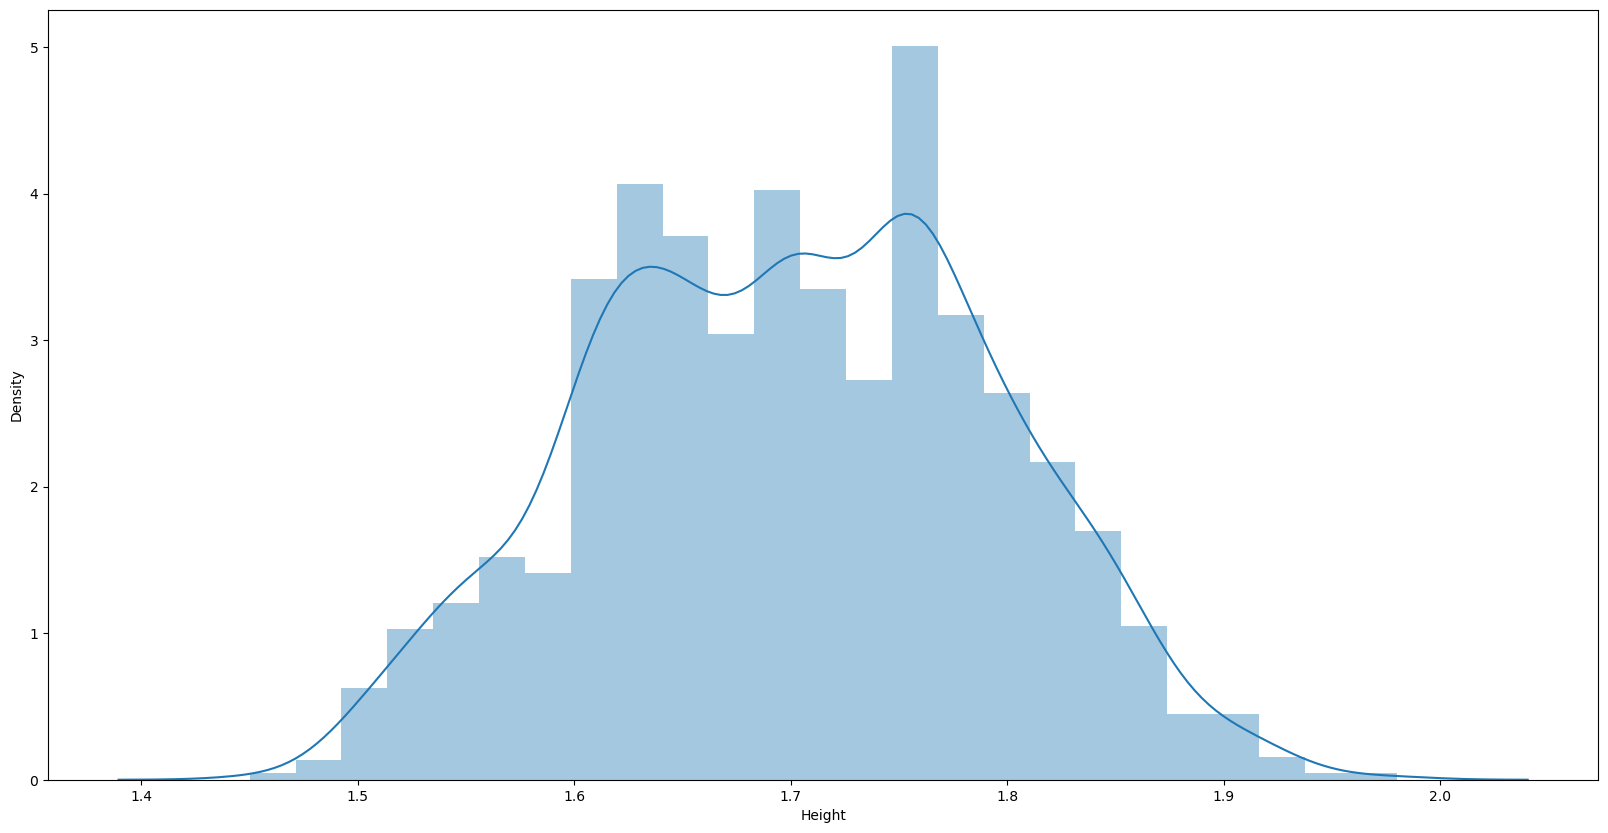

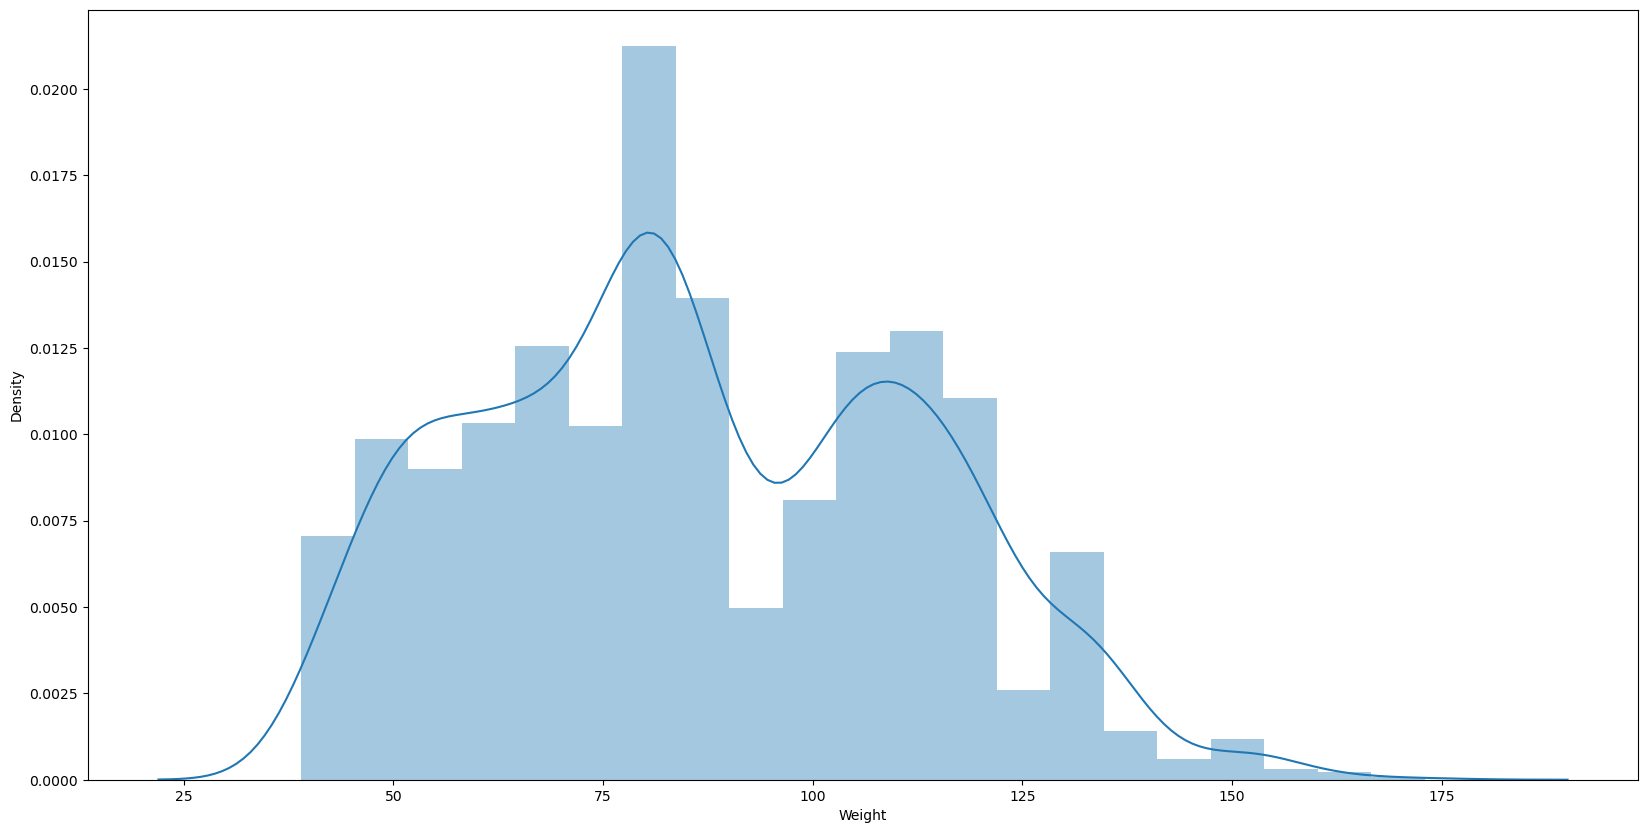

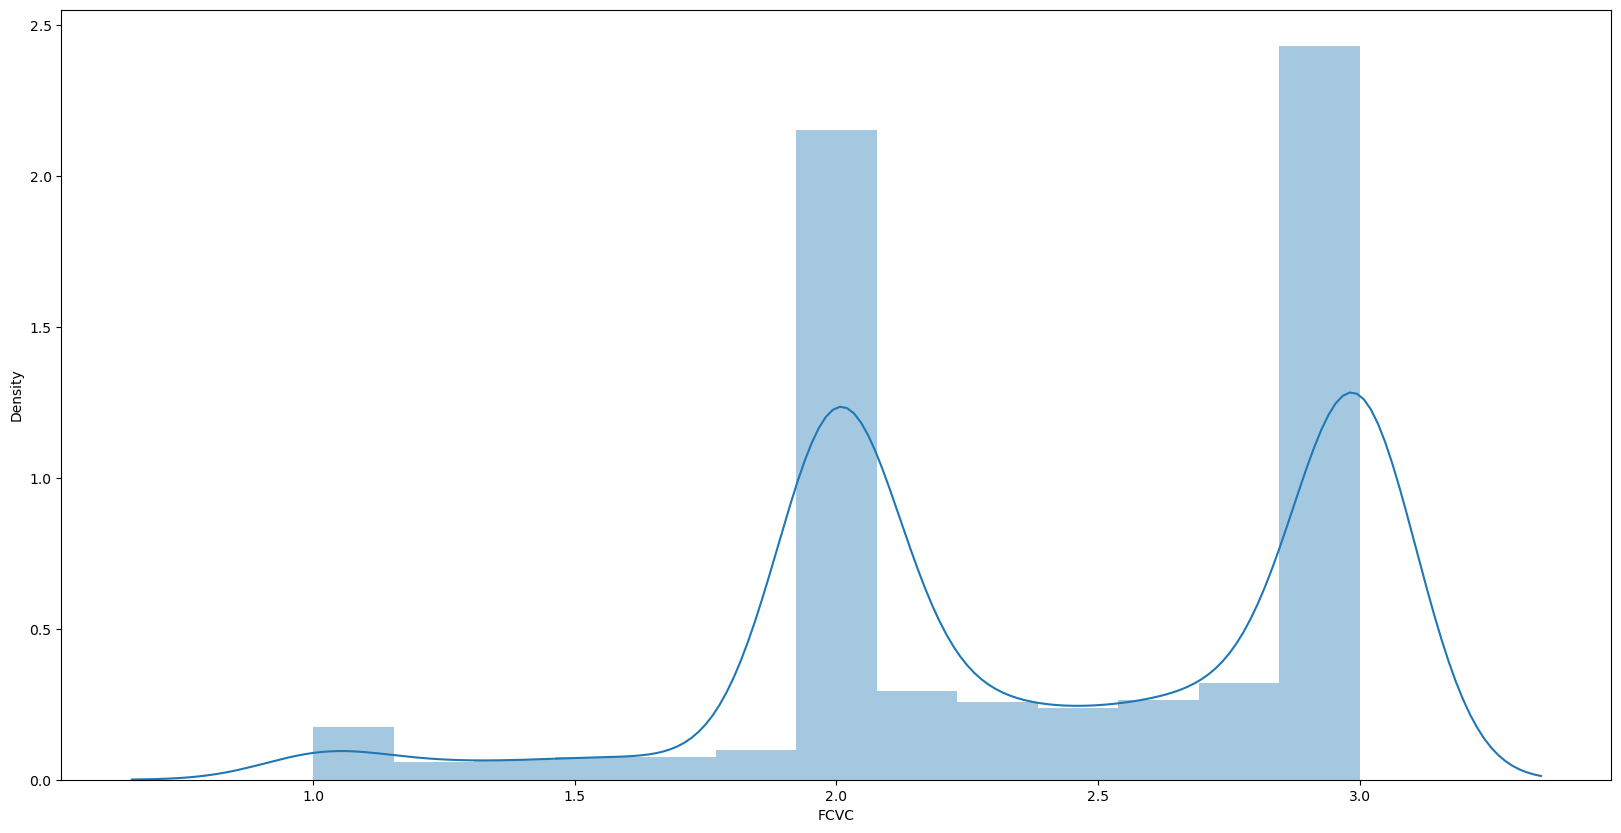

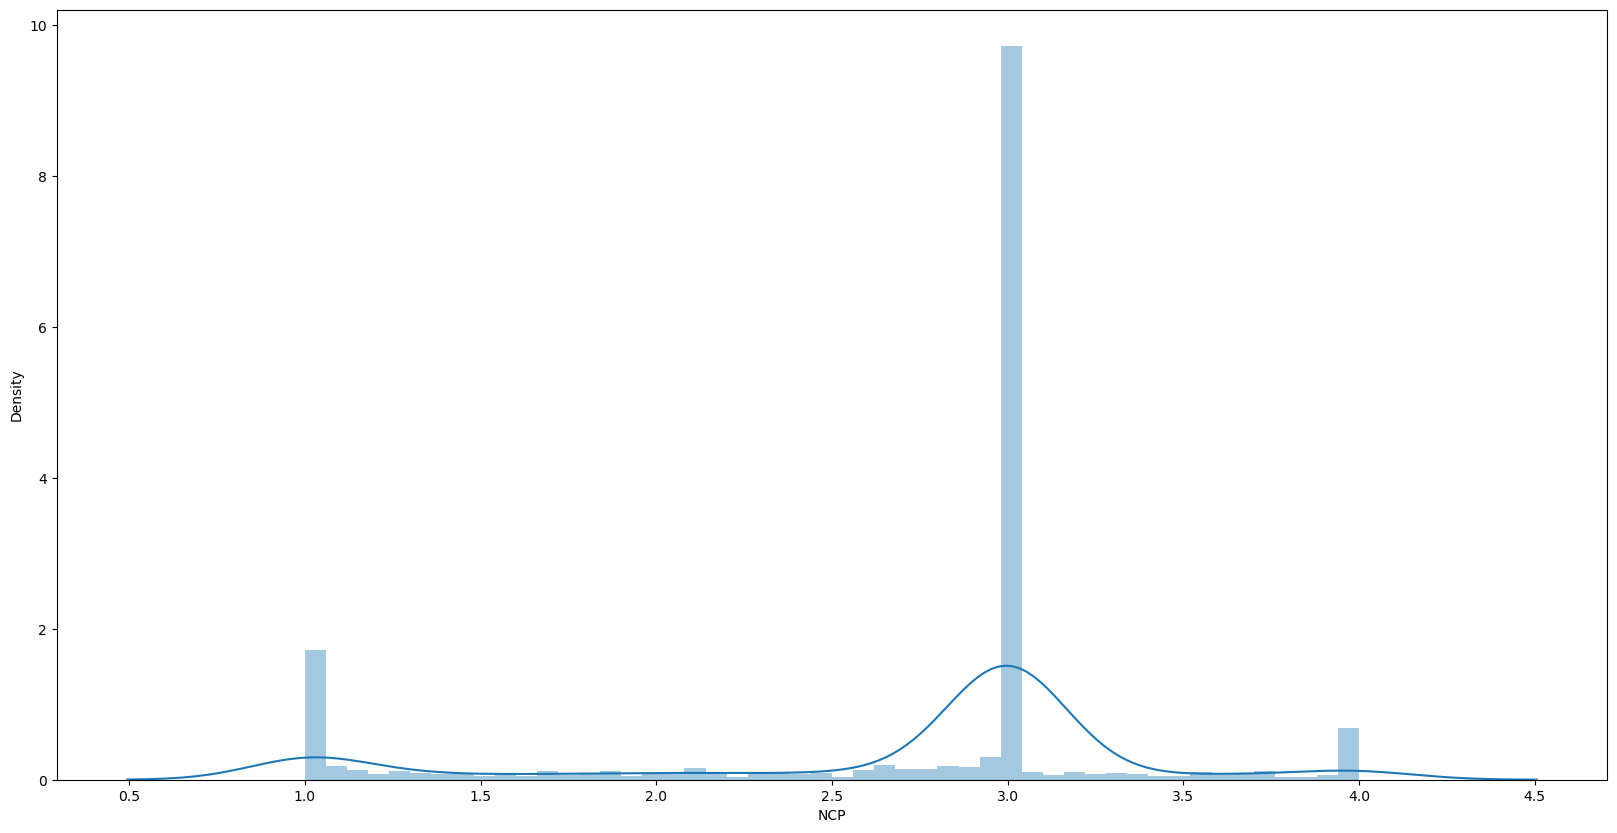

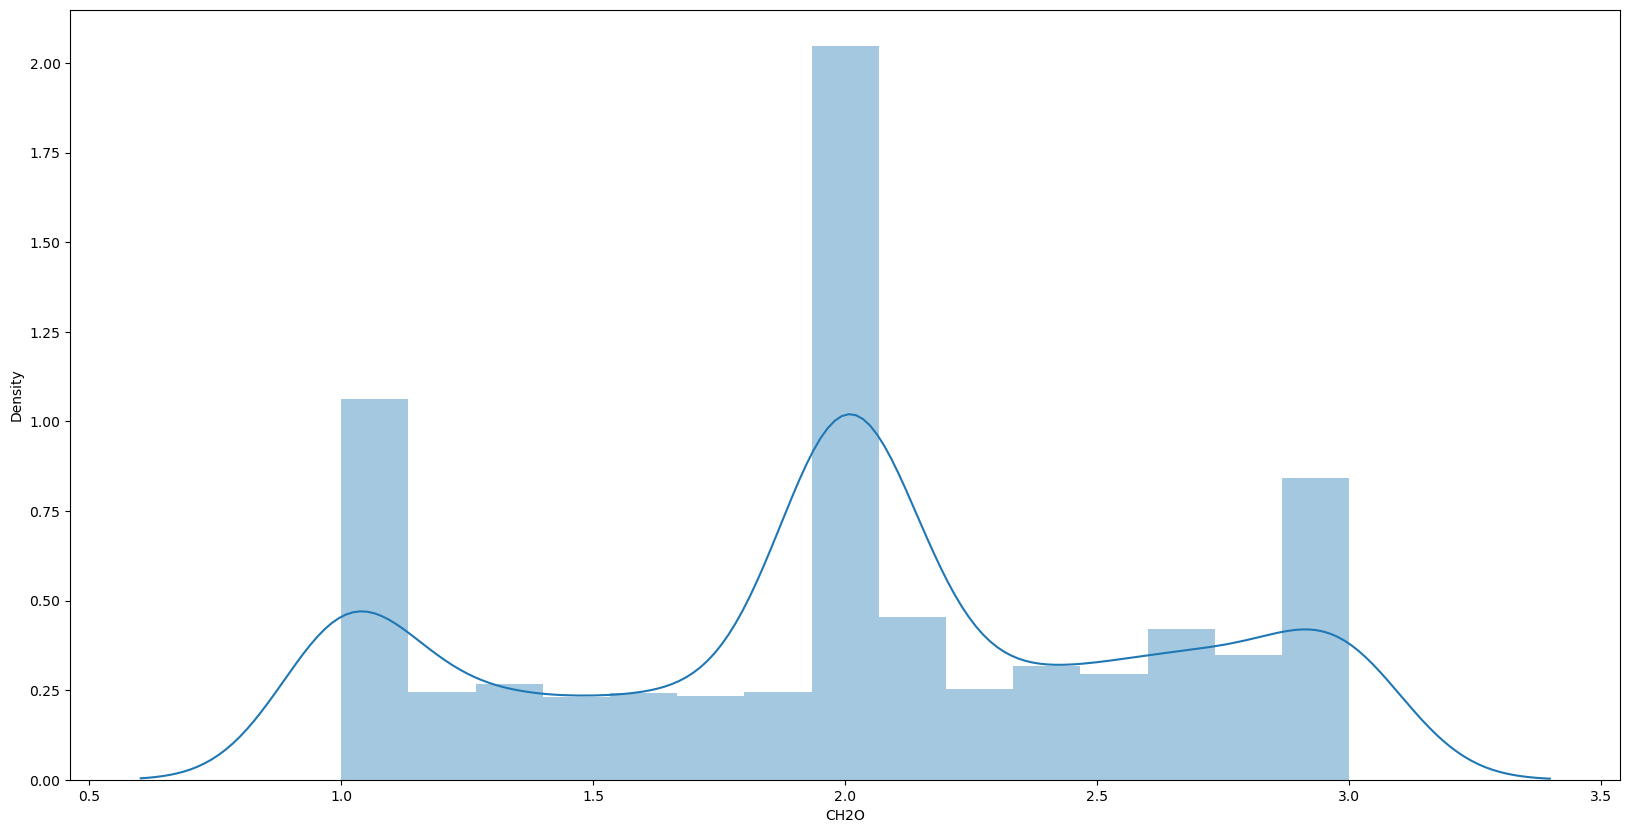

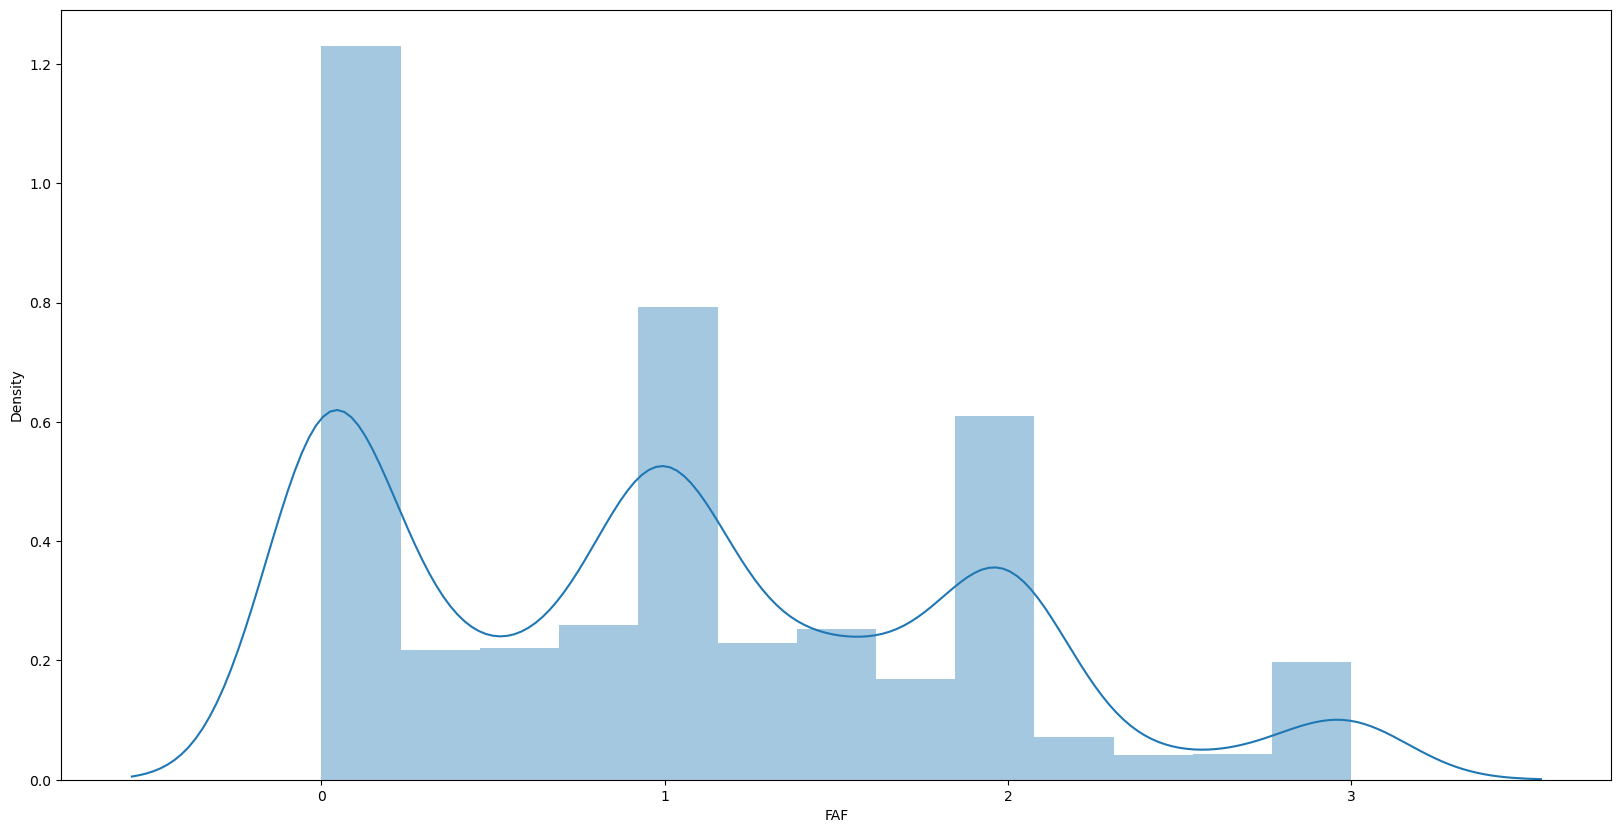

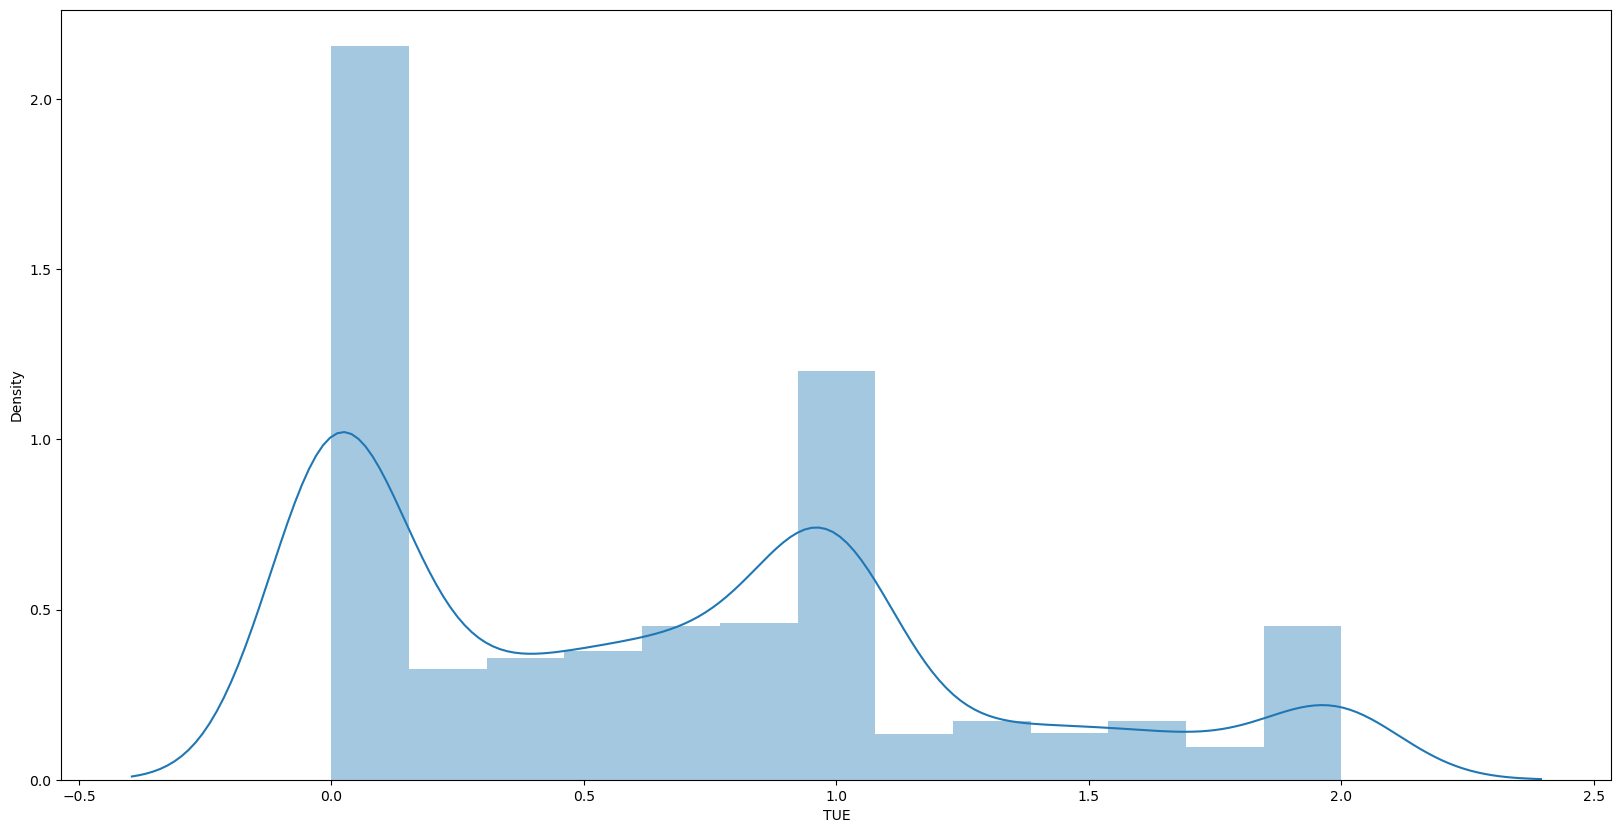

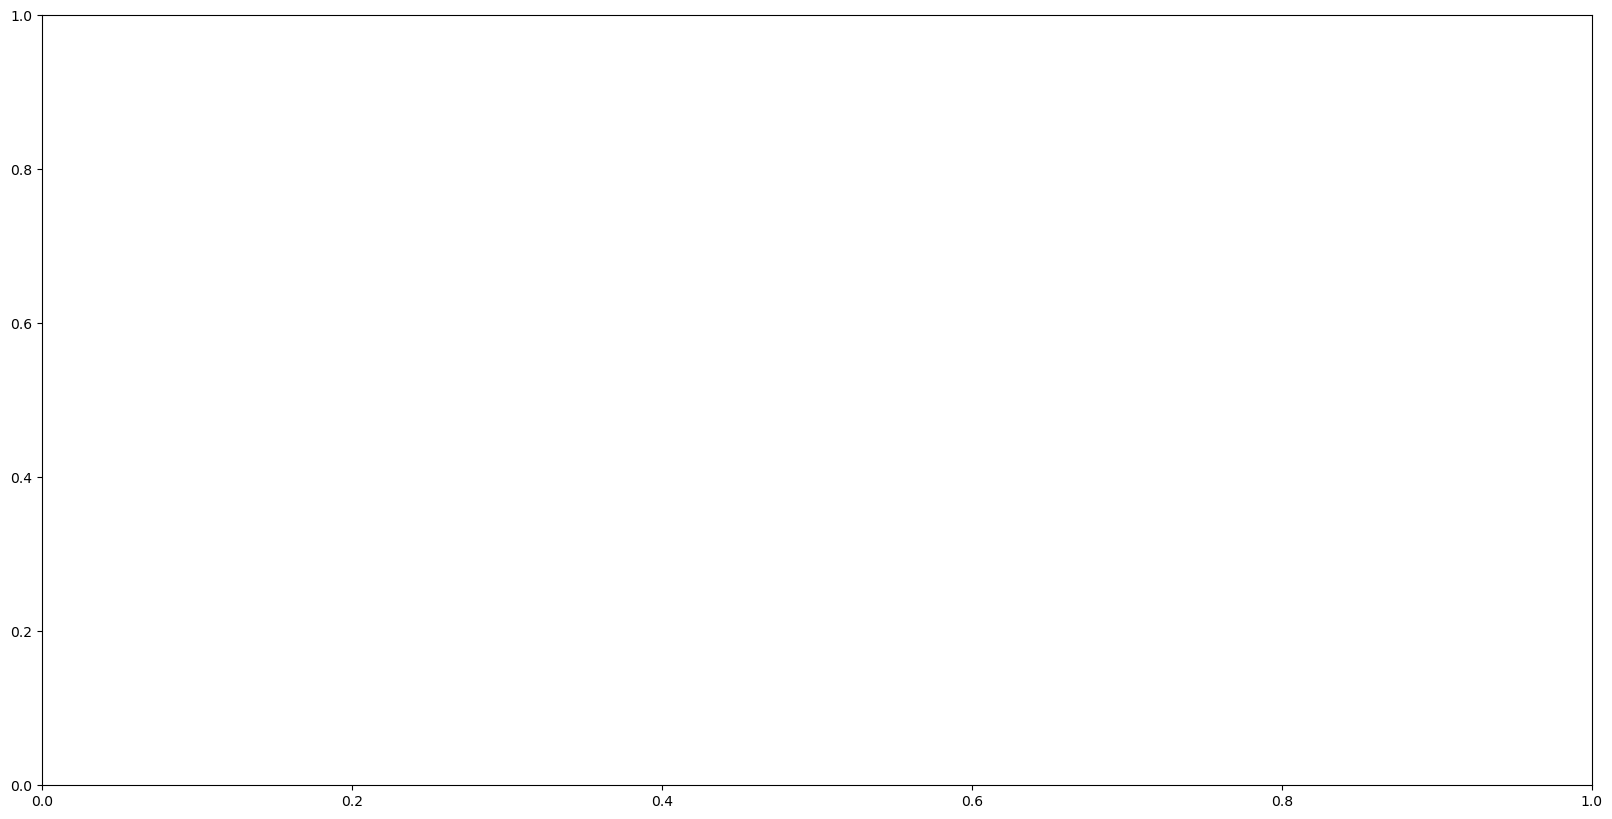

In [42]:
# Print the last 5 rows of the dataframe
df.tail()
# Print the shape of the dataframe
df.shape
# Print the columns of the dataframe
df.columns
# Print the information of the dataframe
df.info()
# Print the summary statistics of the dataframe
df.describe()
# Print the unique values of the dataframe
df.nunique()
# Print the missing values of the dataframe
df.isnull().sum()
# Print the count of each class in the dataframe
df['NObeyesdad'].value_counts()
# Visualize the count of each class
sns.countplot(df['NObeyesdad'])
# Visualize the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
# Visualize the distribution of the Age column
plt.figure(figsize=(20,10))
sns.distplot(df['Age'])
# Visualize the distribution of the Height column
plt.figure(figsize=(20,10))
sns.distplot(df['Height'])
# Visualize the distribution of the Weight column
plt.figure(figsize=(20,10))
sns.distplot(df['Weight'])
# Visualize the distribution of the FCVC column
plt.figure(figsize=(20,10))
sns.distplot(df['FCVC'])
# Visualize the distribution of the NCP column
plt.figure(figsize=(20,10))
sns.distplot(df['NCP'])
# Visualize the distribution of the CH2O column
plt.figure(figsize=(20,10))
sns.distplot(df['CH2O'])
# Visualize the distribution of the FAF column
plt.figure(figsize=(20,10))
sns.distplot(df['FAF'])
# Visualize the distribution of the TUE column
plt.figure(figsize=(20,10))
sns.distplot(df['TUE'])
# Visualize the distribution of the CALC column
plt.figure(figsize=(20,10))
sns.distplot(df['CALC'])
# Visualize the distribution of the MTRANS column
plt.figure(figsize=(20,10))
sns.countplot(df['MTRANS'])
# Visualize the distribution of the NObeyesdad column
plt.figure(figsize=(20,10))
sns.countplot(df['NObeyesdad'])
#label encoding
le = LabelEncoder()
# Apply label encoding to each column with categorical data
df['MTRANS'] = le.fit_transform(df['MTRANS'])
# Print the first 5 rows of the dataframe
df.head()
# Print the unique values of the dataframe
df.nunique()
# Print the information of the dataframe
df.info()
# Print the summary statistics of the dataframe
df.describe()
# Print the missing values of the dataframe
df.isnull().sum()
# Print the count of each class in the dataframe
df['NObeyesdad'].value_counts()
# Visualize the count of each class
sns.countplot(df['NObeyesdad'])
# Visualize the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
# Split the data into independent 'X' and dependent 'Y' variables
X = df.drop(columns=['NObeyesdad'])
Y = df['NObeyesdad']
# Split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
# Get the shape of the training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# Create and train the Logistic Regression Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, Y_train)
# Print the LR Classifier model
print(lr_classifier)
# Create and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, Y_train)
# Print the DT Classifier model
print(dt_classifier)
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)
# Print the RF Classifier model
print(rf_classifier)
# Create and train the KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
# Print the KNN Classifier model
print(knn_classifier)



   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

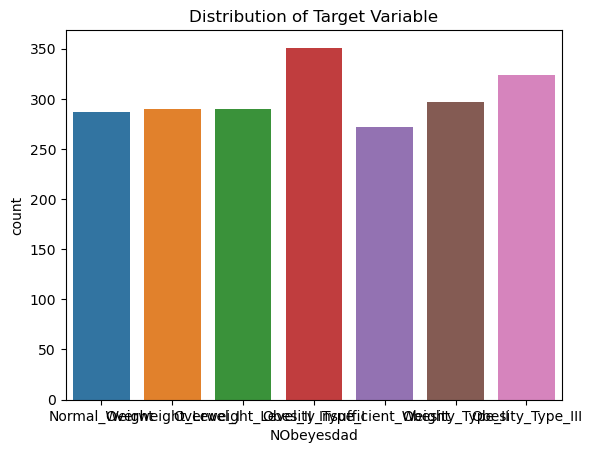

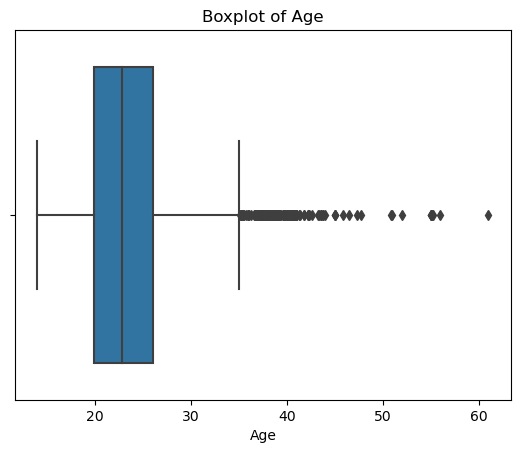

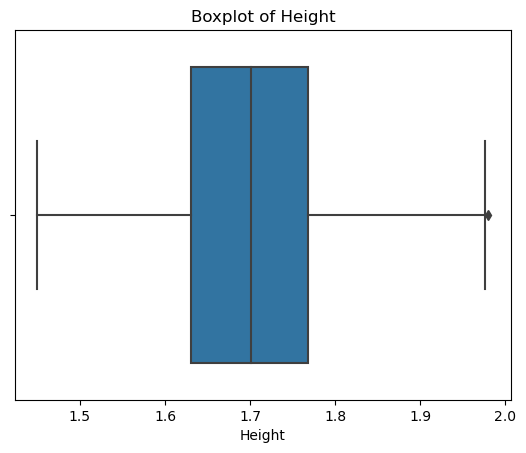

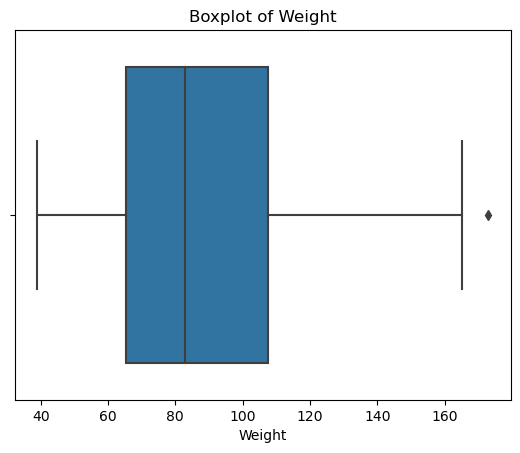

KeyError: 'BMI_value'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("C:\\Users\\Realme\\Desktop\\Datasets\\ObesityDataSet_raw_and_data_sinthetic.csv")

# Data Exploration and Visualization
# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())



# Distribution of target variable
sns.countplot(x="NObeyesdad", data=data)
plt.title("Distribution of Target Variable")
plt.show()

# Boxplot for numerical features
numerical_features = ["Age", "Height", "Weight", "BMI_value", "BP"]
for feature in numerical_features:
    sns.boxplot(x=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


# Outlier Handling
# Assuming outliers are present in "Weight" and "Blood Pressure"

# Handling outliers using Winsorization
def winsorize_outliers(data, feature, lower_bound=0.05, upper_bound=0.95):
    lower_quantile = data[feature].quantile(lower_bound)
    upper_quantile = data[feature].quantile(upper_bound)
    data[feature] = data[feature].clip(lower=lower_quantile, upper=upper_quantile)
    return data

data = winsorize_outliers(data, "Weight")
data = winsorize_outliers(data, "BP")

# Data Preprocessing
# Separate features and target variable
X = data.drop("NObeyesdad", axis=1)
y = data["NObeyesdad"]

# Encode categorical variables
label_encoder = LabelEncoder()
X["Gender"] = label_encoder.fit_transform(X["Gender"])
# Encode other categorical variables if necessary

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

models = {
    "Logistic Regression": logistic_regression,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "SVM": svm
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")

# Select the best model based on performance

# Fine-tune and validate the selected model if needed

# Use the selected model to predict new instances


In [1]:
import csv
import pandas as pd

url = 'https://github.com/Dr-Sanjay/Datasets/blob/main/Assignments/ObesityDataSet_raw_and_data_sinthetic.csv'

with open(url, 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

df = pd.DataFrame(data[1:], columns=data[0])  # Assuming the first row contains column headers


OSError: [Errno 22] Invalid argument: 'https://github.com/Dr-Sanjay/Datasets/blob/main/Assignments/ObesityDataSet_raw_and_data_sinthetic.csv'

In [ ]:
import csv
import requests

url = 'https://raw.githubusercontent.com/Dr-Sanjay/Datasets/main/Assignments/ObesityDataSet_raw_and_data_sinthetic.csv'

response = requests.get(url)
text = response.text

# Now you can process the CSV data
reader = csv.reader(text.splitlines())
data = list(reader)

# Print the first few rows of data
for row in data[:5]:
    print(row)


In [ ]:
Q-3. Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
Q-6. Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
Q-7. Imagine you have a dataset where you need to predict the Genres of Music
using
an Unsupervised algorithm and you need to find the accuracy of the model, built-in
docker, and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
Q-8. Quora question pair similarity, you need to find the Similarity between two
questions by mapping the words in the questions using TF-IDF, and using a supervised
Algorithm you need to find the similarity between the questions.
Dataset This is the Dataset You can use this dataset for this question.


Q-9. A cyber security agent wants to check the Microsoft Malware so need he came
to you as a Machine learning Engineering with Data, You need to find the Malware
using a supervised algorithm and you need to find the accuracy of the model.
Dataset This is the Dataset You can use this dataset for this question.
1. An Ad- Agency analyzed a dataset of online ads and used a machine learning
model to predict whether a user would click on an ad or not.
Dataset This is the Dataset You can use this dataset for this question.

### ADVANCED QUESTIONS :

In [ ]:


Q-1. A Social Media Influencer collected data on Facebook friend requests and used
a supervised algorithm to predict whether a user would accept a friend request or
not. Dataset This is the Dataset You can use this dataset for this question. Note : Use
only Dask and Use MLflow

In [ ]:
Q-2. A chemist had two chemical flasks labeled 0 and 1 which consist of two
different chemicals. He extracted 3 features from these chemicals in order to
distinguish between them, you provided the results derived by the chemicals and
your task is to create a model that will label chemical 0 or 1 given its three features
and built-in docker and use some library to display that in frontend.
Note : Use only pyspark
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
Q- 3. A company wants to predict the sales of its product based on the money spent
on different platforms for marketing. They want you to figure out how they can
spend money on marketing in the future in such a way that they can increase their
profit as much as possible built-in docker and use some library to display that in
frontend Dataset This is the Dataset You can use this dataset for this question. Note:
Use only Dask

In [ ]:
Q-4. Take any 3 questions and deploy them to AWS using GitHub Actions and
show a demo link

In [ ]:

Q-5. Take any 3 questions and deploy them to AWS using Circle-CI and show a
demo link